# 1교시

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## 1. Estimator란?

### Classifier와 Regressor를 합친 클래스
### 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭

## 2. K-Fold 교차검증과 Stratified K-Fold의 차이점

### stratified kfold 는 층화 추출과 집락 추출로 나뉘는데 층화는 각 집단안에서 무작위 추출이고 집락 추출을 집단을 하나를 골라서 표본을 추출한다. 
### kfold 는 전체에서 랜덤으로 추출 

## 3. depth = 7, split = 2, leaf = 4, cv = 5  일 때 트레이닝 횟수는?

## 7x2x4x5 = 280


## 4. 

In [4]:
import pydataset

In [5]:
diamonds = pydataset.data('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 4-2. X, y 나누기
### target(y): cut
### X: carat, depth, table, price, x, y, z


In [10]:
X = diamonds[['carat','depth','table','price','x','y','z']]
y = diamonds['cut']

## 4-3. train, test 4개로 분리 (7:3) 비율

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## 4-4. classifier 만들기

In [12]:
dt_clf = DecisionTreeClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV
grid_parameter = {'max_depth':[1,2,3,4,5,6,7],'min_samples_split':[1,2], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf = GridSearchCV(dt_clf, param_grid=grid_parameter, cv=5)

## 4-5. best_params = ?

In [18]:
grid_dt_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2]})

In [19]:
grid_dt_clf.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}

## 4-6. best_estimator를 이용하여, 예측하고, 정확도를 구해봅시다

In [24]:
pred = grid_dt_clf.best_estimator_
pred_result = pred.predict(X_test)
accuracy_score(y_test, pred_result)

# pred = grid_dt_clf.best_estimator_.predict(X_test) 
# accuracy_score(y_test, pred)


0.7351996044988258

## 4-7. diamonds['cut']을 범주형(category)으로 바꾸어 봅시다

## 실행시키면 시간이 얼마나 단축되는가?

In [26]:
diamonds['cut'].astype('category')

1            Ideal
2          Premium
3             Good
4          Premium
5             Good
           ...    
53936        Ideal
53937         Good
53938    Very Good
53939      Premium
53940        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [27]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [28]:
X = diamonds[['carat','depth','table','price','x','y','z']]
y = diamonds['cut']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

dt_clf = DecisionTreeClassifier()

grid_parameter = {'max_depth':[1,2,3,4,5,6,7],'min_samples_split':[1,2], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf = GridSearchCV(dt_clf, param_grid=grid_parameter, cv=5)

grid_dt_clf.fit(X_train,y_train)

grid_dt_clf.best_params_

pred = grid_dt_clf.best_estimator_.predict(X_test) 
accuracy_score(y_test, pred)


0.7361265603757261

## 5. airquality

In [47]:
air = pydataset.data('airquality')
air

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
6,28.0,NaN,14.9,66,5,6
7,23.0,299.0,8.6,65,5,7
8,19.0,99.0,13.8,59,5,8
9,8.0,19.0,20.1,61,5,9
10,NaN,194.0,8.6,69,5,10


## 5-2. 결측치가 있는지? 몇개인지?

In [32]:
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

## 5-3. 결측치가 있는 칼럼들의 values를 0으로 바꾸기

In [48]:
air = air.fillna(0)
air

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,0.0,0.0,14.3,56,5,5
6,28.0,0.0,14.9,66,5,6
7,23.0,299.0,8.6,65,5,7
8,19.0,99.0,13.8,59,5,8
9,8.0,19.0,20.1,61,5,9
10,0.0,194.0,8.6,69,5,10


In [36]:
air['Month'].unique()

array([5, 6, 7, 8, 9], dtype=int64)

## 5-4. unique() 배열에서 5,6 은 spring, 7,8,9 는 summer 로 air['season'] 칼럼을 만드세여

In [49]:
air['season'] = air['Month'].replace({5:'spring',
                                      6:'spring',
                                      7:'summer',
                                      8:'summer',
                                      9:'summer'})

In [43]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day,season
1,41.0,190.0,7.4,67,5,1,spring
2,36.0,118.0,8.0,72,5,2,spring
3,12.0,149.0,12.6,74,5,3,spring
4,18.0,313.0,11.5,62,5,4,spring
5,0.0,0.0,14.3,56,5,5,spring
6,28.0,0.0,14.9,66,5,6,spring
7,23.0,299.0,8.6,65,5,7,spring
8,19.0,99.0,13.8,59,5,8,spring
9,8.0,19.0,20.1,61,5,9,spring
10,0.0,194.0,8.6,69,5,10,spring


## 5-5. air['season']을 category형으로 바꾸고
## X : Ozone, Solrar.R, Wind, Temp, y : season
## 으로 GridSearchCV를 이용하여 dt_clf의 정확도를 구하세요

In [50]:
air['season'].astype('category')

1      spring
2      spring
3      spring
4      spring
5      spring
6      spring
7      spring
8      spring
9      spring
10     spring
11     spring
12     spring
13     spring
14     spring
15     spring
16     spring
17     spring
18     spring
19     spring
20     spring
21     spring
22     spring
23     spring
24     spring
25     spring
26     spring
27     spring
28     spring
29     spring
30     spring
31     spring
32     spring
33     spring
34     spring
35     spring
36     spring
37     spring
38     spring
39     spring
40     spring
41     spring
42     spring
43     spring
44     spring
45     spring
46     spring
47     spring
48     spring
49     spring
50     spring
51     spring
52     spring
53     spring
54     spring
55     spring
56     spring
57     spring
58     spring
59     spring
60     spring
61     spring
62     summer
63     summer
64     summer
65     summer
66     summer
67     summer
68     summer
69     summer
70     summer
71     summer
72    

In [51]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 1 to 153
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
 6   season   153 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 9.6+ KB


In [52]:
X = air[['Ozone','Solar.R','Wind','Temp']]
y = air['season']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

dt_clf = DecisionTreeClassifier()

grid_parameter = {'max_depth':[1,2,3,4,5,6,7],'min_samples_split':[1,2], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf = GridSearchCV(dt_clf, param_grid=grid_parameter, cv=5)

grid_dt_clf.fit(X_train,y_train)

grid_dt_clf.best_params_

pred = grid_dt_clf.best_estimator_.predict(X_test) 
accuracy_score(y_test, pred)


0.717391304347826

In [53]:
accuracy_score(y_test, pred).round(4)

0.7174

In [54]:
print('{0:.4f}'.format(accuracy_score(y_test, pred)))

0.7174


In [55]:
acc = accuracy_score(pred, y_test) 
print(f'{acc:.4f}') 

0.7174


# 2교시 116p ~ 

## 레이블 인코딩

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

In [60]:
# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()

In [64]:
# 비지도학습과 피처추출에서 fit은 훈련을 의마하는게 아니라 입력 데이터의
# 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업임
encoder.fit(items)
labels = encoder.transform(items)

In [63]:
labels 

array([0, 1, 4, 5, 3, 3, 2, 2])

In [65]:
labels = encoder.fit_transform(items)

In [66]:
labels

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [67]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [68]:
encoder.inverse_transform([0,1,4,5,3,3,2,2])

array(['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서'], dtype='<U5')

## 원핫인코딩

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(items)
one_hot_encoder.transform(items)
# 오류 : array를 2차원으로 reshape 해줘야 함

ValueError: Expected 2D array, got 1D array instead:
array=['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [72]:
items

['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [74]:
np.array(items).shape

(8,)

In [76]:
# reshape(-1,1) -> [ ,]
#                  [ ,]
#                  [ ,]
#                  [ ,]
#                  .
#                  .
#                  .
# reshape(1,-1) -> [ , ] , [ , ] , [ , ] , [ , ] . . .                    


items = np.array(items).reshape(-1,1)

In [149]:
items

array([['TV'],
       ['냉장고'],
       ['전자레인지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U5')

In [169]:
type(items)

numpy.ndarray

In [77]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(items)
one_hot_encoder.transform(items)

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [78]:
labels = one_hot_encoder.transform(items)

In [81]:
labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [89]:
labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [91]:
labels.shape

(8, 6)

In [86]:
pd.get_dummies(pd.DataFrame(items)).values

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

## diamonds['cut'] 을 one-hot-encoding 하여 GridSearchCV를 해봅시다.

In [94]:
diamonds['cut']

1            Ideal
2          Premium
3             Good
4          Premium
5             Good
           ...    
53936        Ideal
53937         Good
53938    Very Good
53939      Premium
53940        Ideal
Name: cut, Length: 53940, dtype: object

In [173]:
cut_list = diamonds['cut'].to_list()
cut_list[:5]

['Ideal', 'Premium', 'Good', 'Premium', 'Good']

In [174]:
cut_ndarray = np.array(cut).reshape(-1,1)
cut_ndarray

array([['Ideal'],
       ['Premium'],
       ['Good'],
       ...,
       ['Very Good'],
       ['Premium'],
       ['Ideal']], dtype=object)

In [175]:
type(cut_ndarray)

numpy.ndarray

In [176]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(cut_ndarray)
one_hot_encoder.transform(cut_ndarray)


<53940x5 sparse matrix of type '<class 'numpy.float64'>'
	with 53940 stored elements in Compressed Sparse Row format>

In [178]:
cut = one_hot_encoder.transform(cut_ndarray)

In [185]:
# ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
cut.toarray()[:30]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [186]:
X = diamonds[['carat','depth','table','price','x','y','z']]
y = cut.toarray()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

dt_clf = DecisionTreeClassifier()

grid_parameter = {'max_depth':[1,2,3,4,5,6,7],'min_samples_split':[1,2], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf = GridSearchCV(dt_clf, param_grid=grid_parameter, cv=5)

grid_dt_clf.fit(X_train,y_train)

grid_dt_clf.best_params_

pred = grid_dt_clf.best_estimator_.predict(X_test) 
accuracy_score(y_test, pred)


0.7020145841057965

# 3교시 : 122p ~ 

## 표준화(standardization) : 표준 정규분포로 만드는 것
## 정규화(normalization) : 0 ~ 1 사이 값으로 바꾸는 것

In [138]:
from sklearn.datasets import load_iris
iris = load_iris()

In [107]:
iris_data = iris.data

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names) 

In [108]:
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [119]:
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [120]:
iris_df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [121]:
(( iris_df - iris_df.mean() ) / iris_df.std())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
5,-0.535384,1.933315,-1.165809,-1.048667
6,-1.501490,0.786174,-1.335752,-1.179859
7,-1.018437,0.786174,-1.279104,-1.311052
8,-1.743017,-0.360967,-1.335752,-1.311052
9,-1.139200,0.097889,-1.279104,-1.442245


## StandardScaler 이용

In [126]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler()
scaler.fit(iris_df)
scaled = scaler.transform(iris_df)
# scaled = scaler.fit_transform(iris_df)

In [128]:
scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [131]:
scaled.mean(axis=0)
scaled.std(axis=0)

array([1., 1., 1., 1.])

In [132]:
pd.DataFrame(scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


## 정규화 <br> [0, 1] 값을 바꾸기

In [134]:
arr = np.array([5,3,7,6,9])
arr

array([5, 3, 7, 6, 9])

In [141]:
iris_data.min()

0.1

In [142]:
iris_data.max()

7.9

In [143]:
(iris_data - iris_data.min(axis=0)) / (iris_data.max(axis=0) - iris_data.min(axis=0))

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## MinMaxScaler 이용

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(iris_data)

In [148]:
scaled.min(axis=0)
scaled.max(axis=0)

array([1., 1., 1., 1.])

# 5교시 : 129p ~

In [274]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [275]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 찾기

In [276]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 칼럼 이름 모두 소문자로 바꾸기

In [277]:
titanic.columns = titanic.columns.str.lower()
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [278]:
titanic['age'].fillna(titanic['age'].mean(),inplace=True)
titanic['cabin'].fillna('N',inplace=True)
titanic['embarked'].fillna('N',inplace=True)

In [279]:
titanic['cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: cabin, Length: 891, dtype: object

In [280]:
titanic['cabin'] = titanic['cabin'].str[:1]
titanic['cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: cabin, Length: 891, dtype: object

In [281]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

## titanic['sex'] 막대 그래프로 그리기

<Axes: >

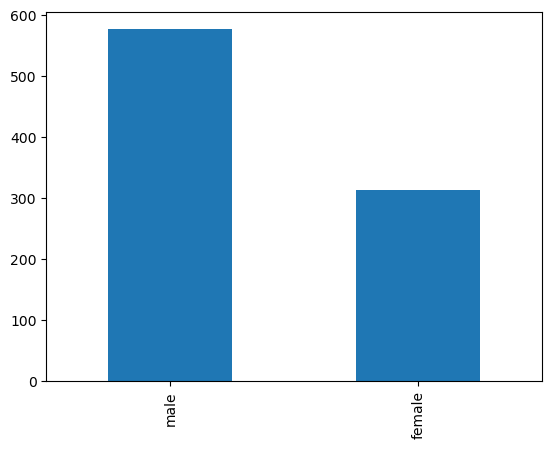

In [282]:
titanic['sex'].value_counts().plot(kind='bar')

# titanic['sex'].value_counts().plot().bar()

In [283]:
import seaborn as sns

<Axes: xlabel='pclass', ylabel='survived'>

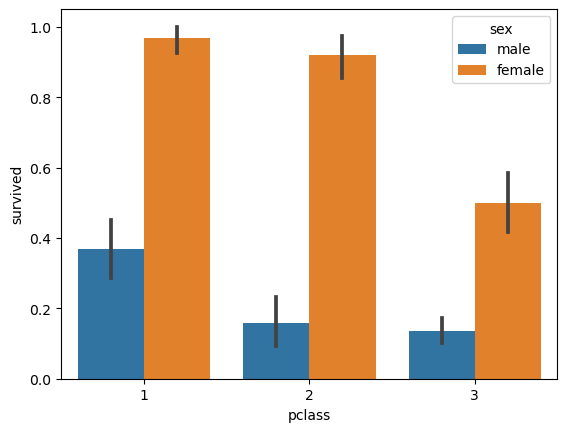

In [284]:
sns.barplot(data = titanic, x = 'pclass', y = 'survived', hue = 'sex')

In [285]:
titanic['survived'].mean()

0.3838383838383838

In [286]:
titanic['age'].astype('int')

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: age, Length: 891, dtype: int32

## age_cat 칼럼을 만든다
### 그 이전 : unknown
### 5 : baby
### 12 : child
### 18 : teenager
### 25 : student
### 35 : young_adult
### 60 : adult 
### 그 이상 : elderly

In [287]:
def get_category(age):
      cat = ''
      if age <= -1: cat = 'unknown'
      elif age <= 5: cat ='baby'
      elif age <= 12: cat = 'child'
      elif age <= 18: cat = 'teenager'
      elif age <= 25: cat = 'student'
      elif age <= 35: cat = 'young_adult'
      elif age <= 60: cat ='adult'
      else : cat = 'elderly'
      
      return cat

titanic['age_cat'] = titanic['age'].apply(lambda x : get_category(x)) 

In [288]:
# bins = [0,5,12,18,25,35,60,100] np.inf = 양의 무한대, -np.inf = 음의 무한대
# label = ['baby', 'child', 'teenager', 'student', 'young adult', 'adult', 'elderly']
# titanic['age_cat'] = pd.cut(titanic['age'], bins, labels = label) 

## age_cat 별로 남여별 생존그래프

<Axes: xlabel='age_cat', ylabel='survived'>

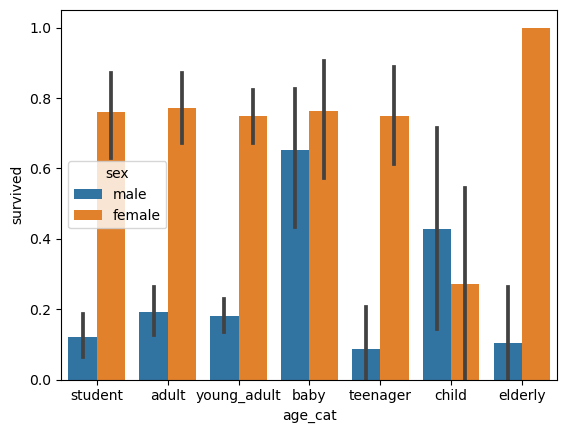

In [289]:
sns.barplot(data = titanic, x= 'age_cat', y = 'survived', hue = 'sex')

## LabelEncoder
### sex, cabin, embarked 3개의 칼럼을 레이블인코딩 해주세요

In [290]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# sex_labels = encoder.fit_transform(titanic['sex'])
# cabin_labels = encoder.fit_transform(titanic['cabin'])
# embarked_labels = encoder.fit_transform(titanic['embarked']) 

# titanic[:1]

In [291]:
l = LabelEncoder()
titanic['sex']=l.fit_transform(titanic['sex'])
titanic['cabin']=l.fit_transform(titanic['cabin'])
titanic['embarked']=l.fit_transform(titanic['embarked'])
titanic[:1] 

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,7,3,student


## drop으로 열 제거

In [292]:
titanic.drop(titanic[['passengerid', 'name', 'ticket']], axis = 1, inplace = True) 

In [293]:
titanic[:3]

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,age_cat
0,0,3,1,22.0,1,0,7.2500,7,3,student
1,1,1,0,38.0,1,0,71.2833,2,0,adult
2,1,3,0,26.0,0,0,7.9250,7,3,young_adult


In [294]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int32  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   cabin     891 non-null    int32  
 8   embarked  891 non-null    int32  
 9   age_cat   891 non-null    object 
dtypes: float64(2), int32(3), int64(4), object(1)
memory usage: 59.3+ KB


In [298]:
X = titanic.iloc[:, 1:9]
y = titanic['survived']

In [309]:
# GridSearch
X = titanic.iloc[:, 1:9]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# dt_clf = DecisionTreeClassifier()

grid_parameter = {'max_depth':[5,6,7],'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf = GridSearchCV(dt_clf, param_grid=grid_parameter, cv=5)

grid = grid_dt_clf.fit(X_train,y_train)

# grid_dt_clf.best_params_

pred = grid.best_estimator_.predict(X_test) 
accuracy_score(y_test, pred)


0.7985074626865671

In [308]:
# DecisionTree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8022388059701493

In [311]:
# RandomForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [354]:
rt_clf = RandomForestClassifier()
rt_clf.fit(X_train, y_train)
pred = rt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.7910447761194029

In [376]:
# 랜덤포레스트 + 그리드서치
rt_clf = RandomForestClassifier()

grid_parameter = {'max_depth':[5,6,7],'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2,3,4]} 
grid_rt_clf = GridSearchCV(rt_clf, param_grid=grid_parameter, cv=5)
grid = grid_rt_clf.fit(X_train,y_train)

pred = grid.best_estimator_.predict(X_test) 
accuracy_score(y_test, pred)

0.7985074626865671

In [375]:
# LogisticRegression
logistic = LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)
pred = logistic.predict(X_test)
accuracy_score(y_test, pred)

0.7761194029850746

# 6교시 : 145p ~ 

In [378]:
from sklearn.metrics import confusion_matrix

In [379]:
confusion_matrix(y_test,pred)

array([[144,   6],
       [ 48,  70]], dtype=int64)